In [60]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.1.24"
# HOST = "192.168.179.2"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [61]:
import pandas as pd

FILE_ID = "20190918012555" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [62]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値右(deg),モーター角度生値左(deg),モーター角度生値(deg),モーター角度(rad),ジャイロ推定角度(rad),...,モーター角速度目標,モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターPWM値目標左,モーターPWM値目標右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーターPWM値左,モーターPWM値右
0,0,0.021165,0.000000,0.021074,41,-13,1,-6.0,-0.104720,0.011458,...,0.0,-3.926991,-0.001676,-36.588583,-36.588583,7323000,0.0,NaN,NaN,NaN
1,1,0.036327,0.015162,0.011084,56,-14,0,-7.0,-0.110715,0.027104,...,0.0,-0.224833,-0.003447,21.949101,21.949101,7392866,0.0,NaN,NaN,NaN
2,2,0.050782,0.014455,0.011041,72,-16,-2,-9.0,-0.129976,0.047218,...,0.0,-0.722261,-0.005527,25.666102,25.666102,7437333,0.0,NaN,NaN,NaN
3,3,0.065174,0.014392,0.011487,75,-17,-3,-10.0,-0.127315,0.068169,...,0.0,0.099777,-0.007564,43.192698,43.192698,7429266,0.0,NaN,NaN,NaN
4,4,0.080417,0.015243,0.010998,42,-16,-2,-9.0,-0.088910,0.079905,...,0.0,1.440174,-0.008986,53.882161,53.882161,7332066,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,1.913475,0.018551,0.014989,-181,-951,-894,-922.5,-16.350913,-0.300781,...,0.0,-11.788350,-11.225323,-100.000000,-100.000000,7315333,0.0,NaN,NaN,NaN
137,137,1.930454,0.016979,0.013498,-224,-966,-908,-937.0,-16.654516,-0.363319,...,0.0,-11.385145,-11.491796,-100.000000,-100.000000,7308266,0.0,NaN,NaN,NaN
138,138,1.948039,0.017585,0.013710,-213,-981,-922,-951.5,-16.970127,-0.422784,...,0.0,-11.835400,-11.763318,-100.000000,-100.000000,7315333,0.0,NaN,NaN,NaN
139,139,1.964524,0.016485,0.013448,-253,-994,-937,-965.5,-17.273938,-0.493418,...,0.0,-11.392910,-12.039701,-100.000000,-100.000000,7324333,0.0,NaN,NaN,NaN


In [63]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    xticks = np.arange(start, time_max, 0.1)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

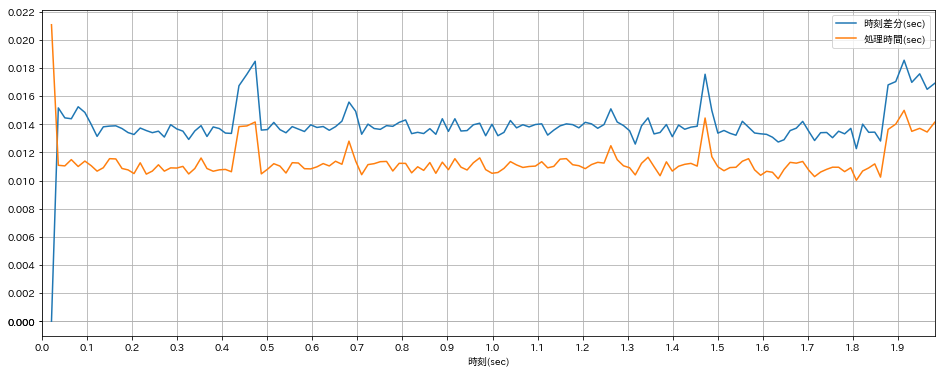

In [64]:
# =======================================================
# 処理時間と時刻差分のグラフの出力

columns_deg = [
    '時刻差分(sec)',
    '処理時間(sec)',
]
show_plot(df, columns_deg, 0.002, figsize=(16,6))

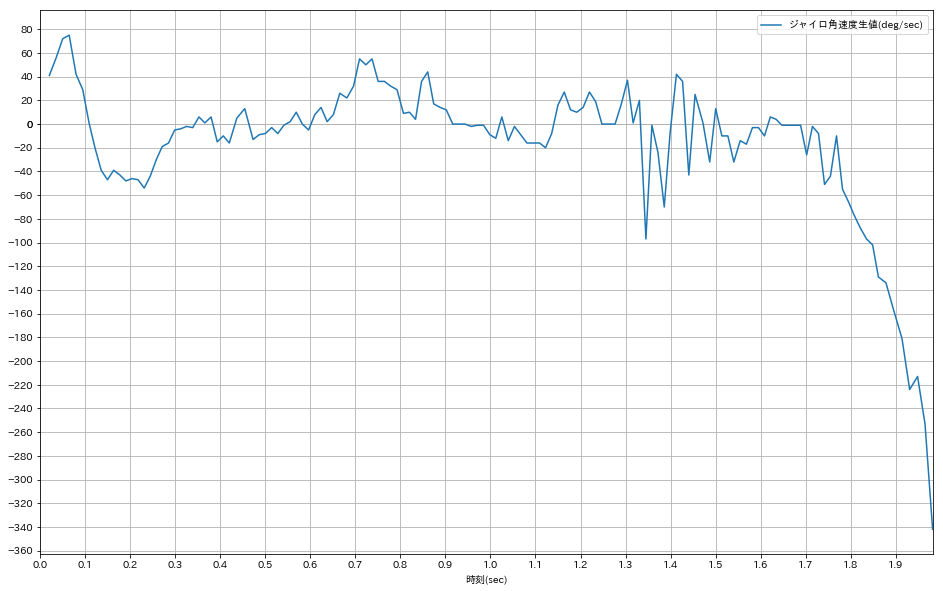

In [65]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

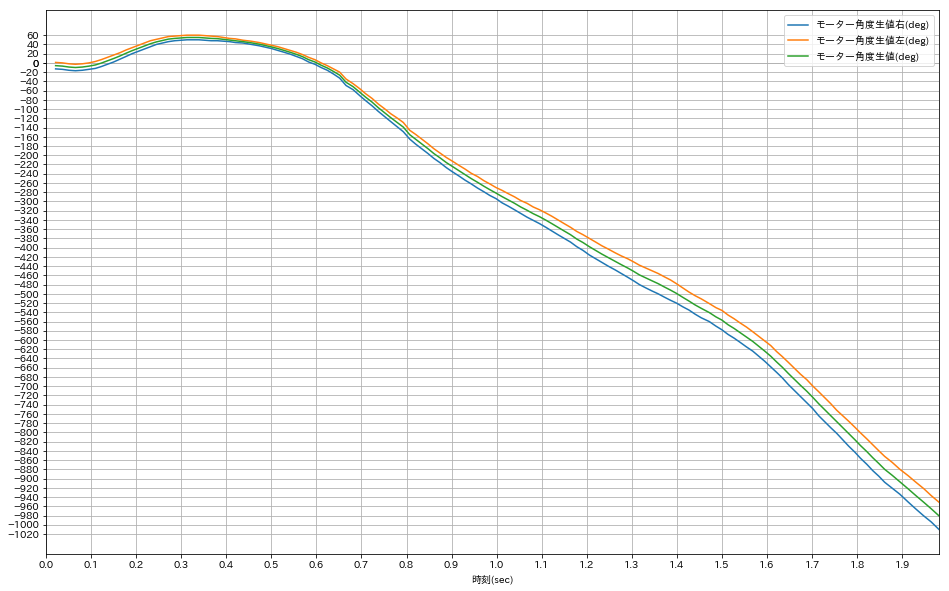

In [66]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'モーター角度生値右(deg)',
    'モーター角度生値左(deg)',
    'モーター角度生値(deg)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

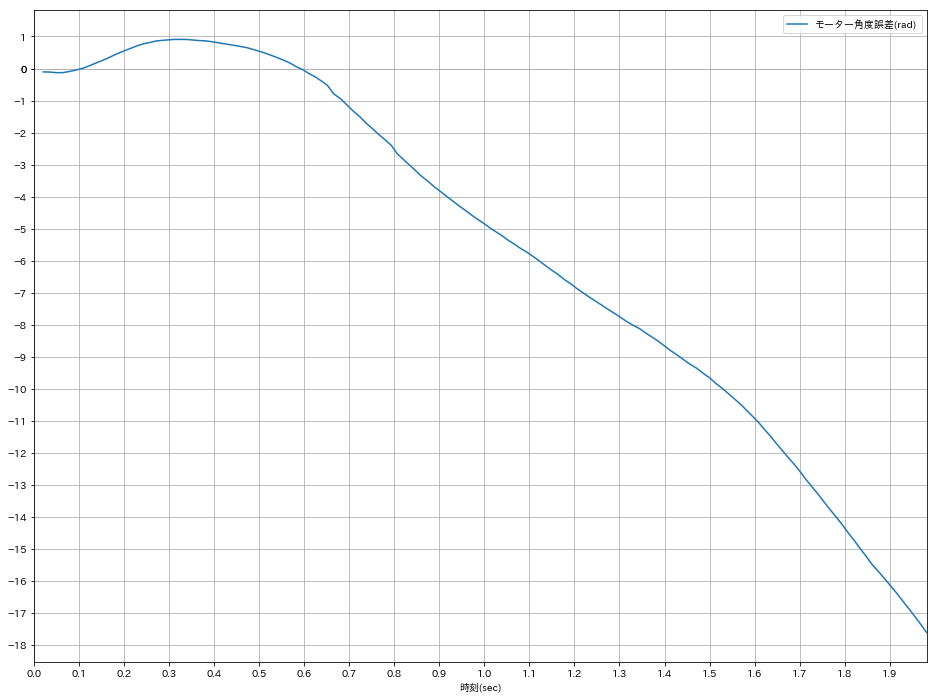

In [67]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

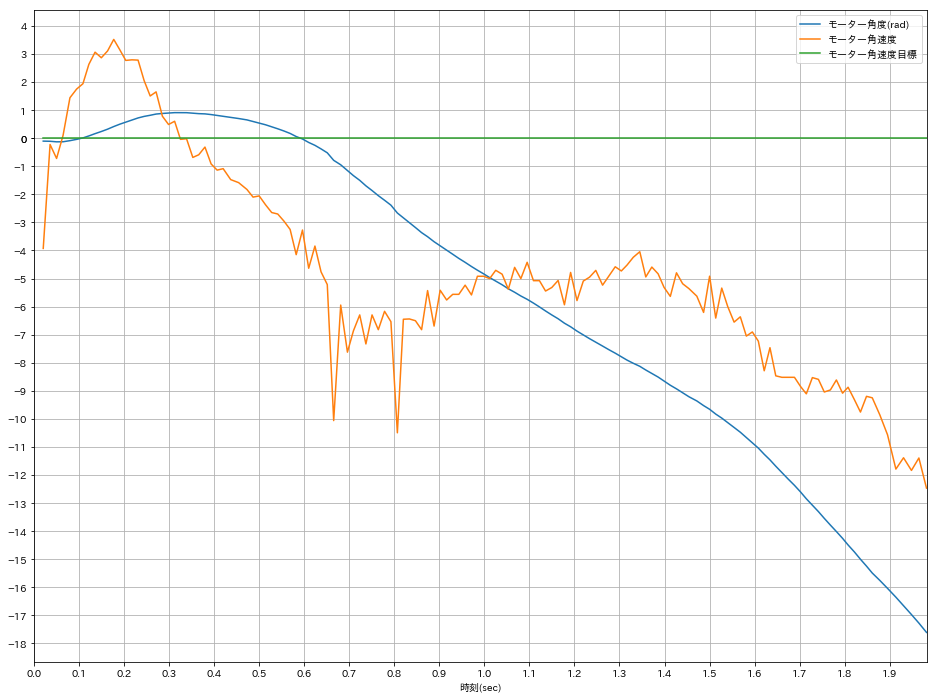

In [68]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度(rad)',
    'モーター角速度',
    'モーター角速度目標'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

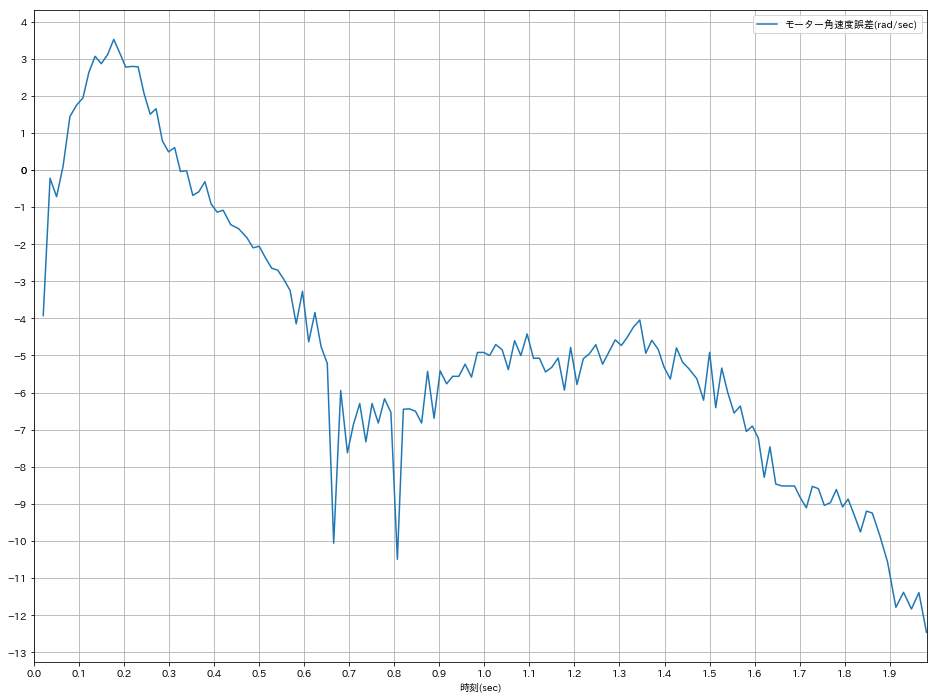

In [69]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角速度誤差(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

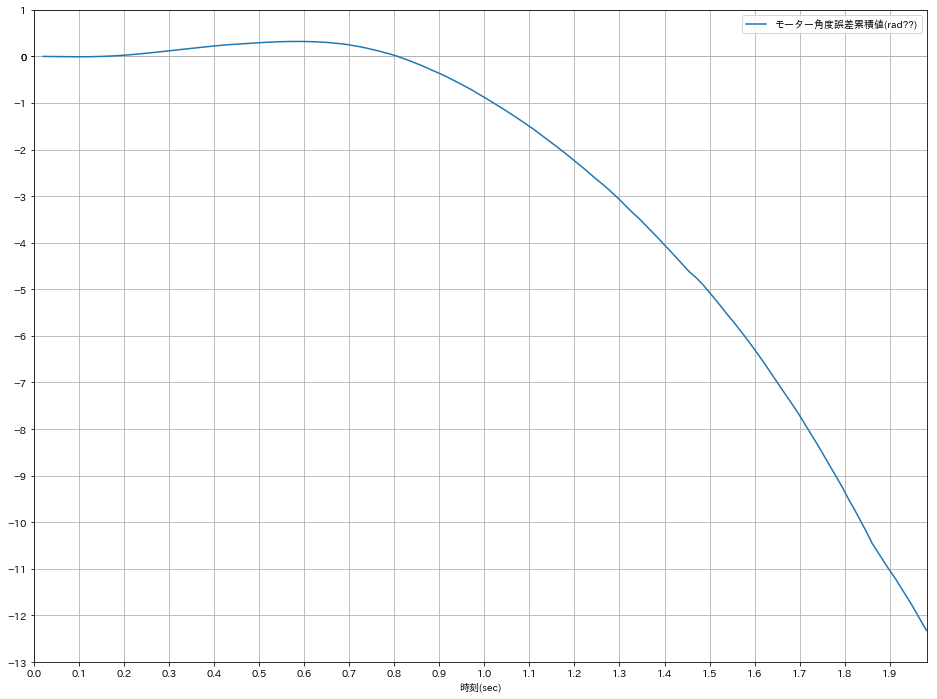

In [70]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

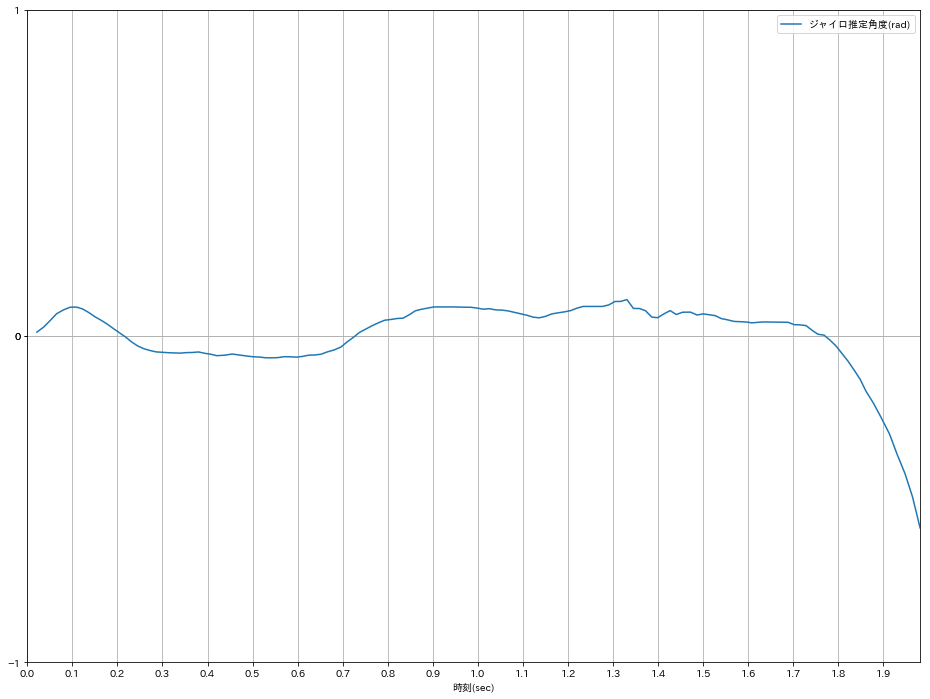

In [71]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

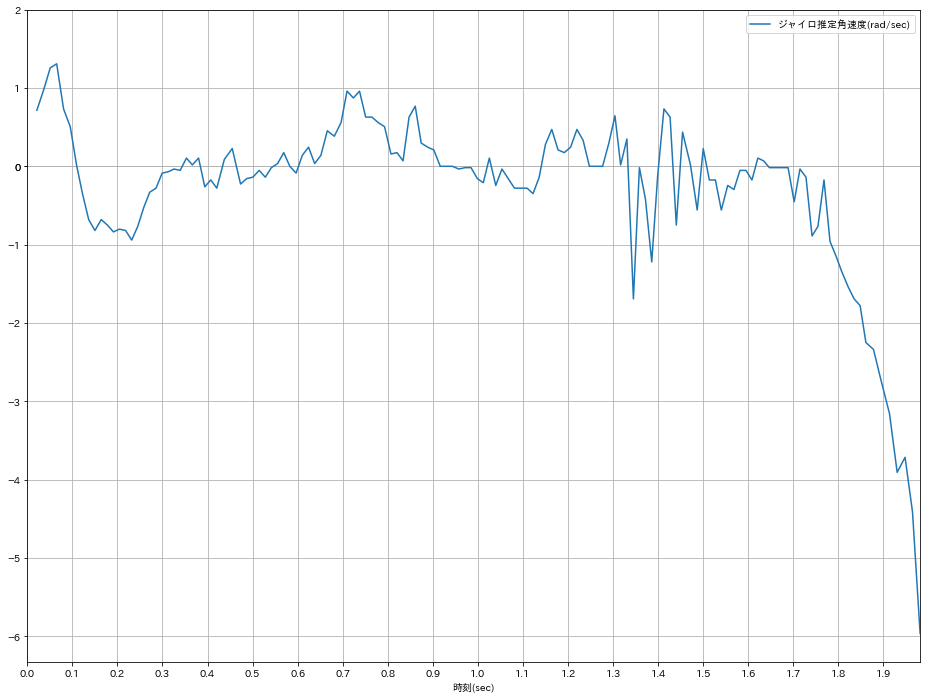

In [72]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角速度(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

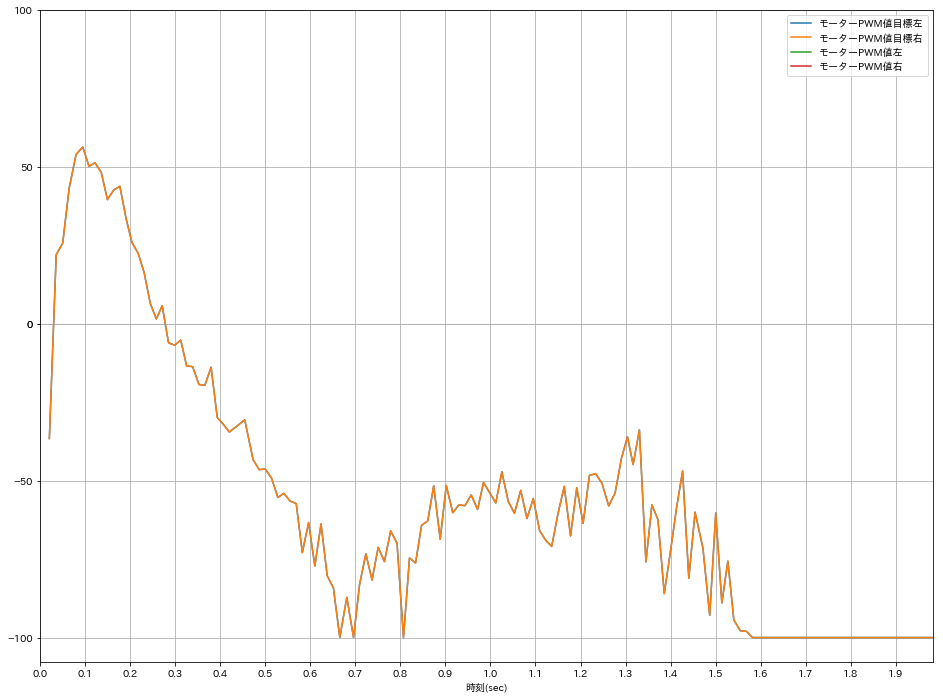

In [73]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターPWM値目標左',
    'モーターPWM値目標右',
    'モーターPWM値左',
    'モーターPWM値右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [74]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/Users/yoshinori/.matplotlib'

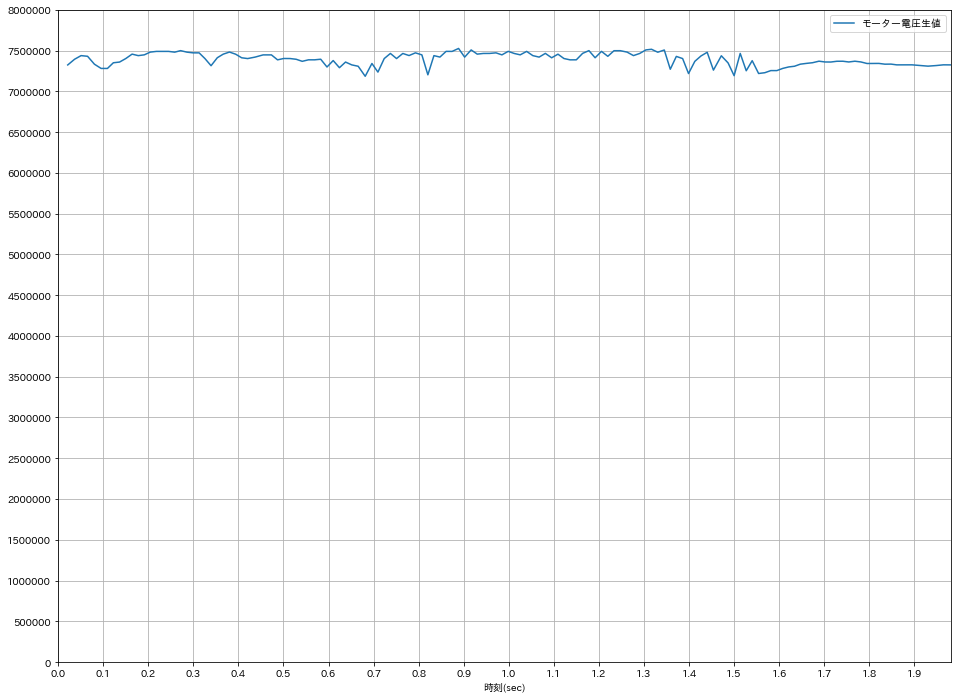

In [75]:
# =======================================================
# モーター電圧生値のグラフ出力

columns_vol = [
    'モーター電圧生値'
]
show_plot(df, columns_vol, 500000, figsize=(16,12)) #, start=0.1, end=0.3)